In [19]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.signal import butter, filtfilt
import glob
import pandas as pd
from tqdm import tqdm

In [37]:
def process_df(signal_path: str, is_noise = False) -> pd.DataFrame:

    eq_signal_files = glob.glob(f'{signal_path}/**/*.npz', recursive=True)

    path_name = "earthquake"
    if is_noise:
        path_name = "noise"

    data = []
    for eq_path in tqdm(eq_signal_files):
        eq = np.load(eq_path, allow_pickle=True)
        Z = eq[path_name + '_waveform_Z']
        N = eq[path_name +'_waveform_N']
        E = eq[path_name +'_waveform_E']
        data.append({'Z': Z, 'N': N, 'E': E})

    df = pd.DataFrame(data)

    return df

In [41]:
signal_path = "C:/Users/cleme/ETH/Master/DataLab/dsl-as24-challenge-3/data/signal/validation"
df_signal = process_df(signal_path, is_noise = False)
signal_path = "C:/Users/cleme/ETH/Master/DataLab/dsl-as24-challenge-3/data/noise/validation"
df_noise = process_df(signal_path, is_noise = True)

100%|██████████| 6100/6100 [00:41<00:00, 146.99it/s]


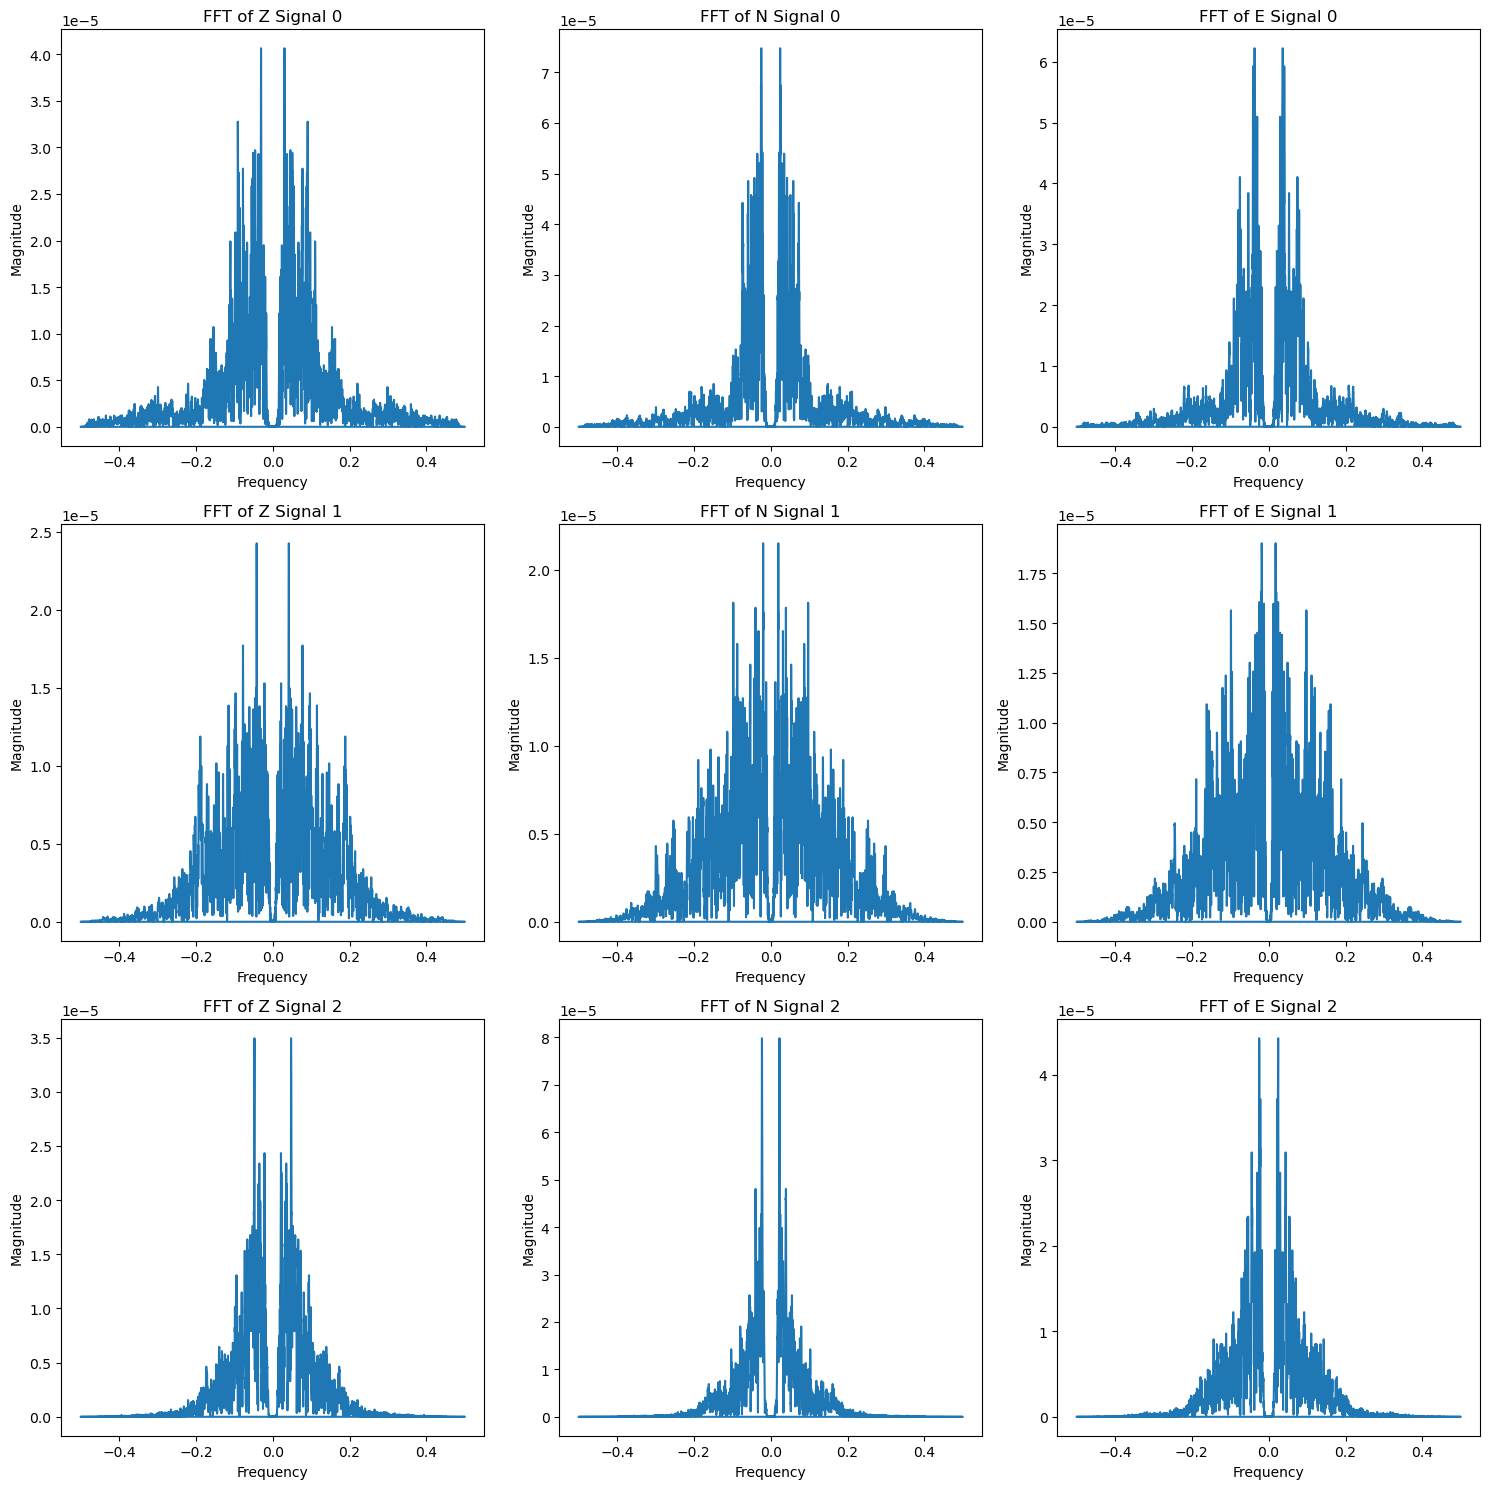

In [42]:
def plot_fourier(df: pd.DataFrame):

    # Function to compute FFT and plot
    def plot_fft(signal, title, ax):
        # Compute FFT
        fft_values = np.fft.fft(signal)
        fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

        # Frequency bins (corresponding to FFT output)
        freqs = np.fft.fftfreq(len(signal))

        # Plot the magnitude of the FFT
        ax.plot(freqs, fft_magnitude)
        ax.set_title(title)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Magnitude')

    N = 3

    # Step 1: Create a figure with subplots
    fig, axs = plt.subplots(N, 3, figsize=(15, 5 * N))

    # Step 2: Compute and plot FFT for each signal in 'Z', 'N', 'E'
    for i in range(N):
        # Plot for Z signal
        plot_fft(df['Z'].iloc[i], f'FFT of Z Signal {i}', axs[i, 0])
        
        # Plot for N signal
        plot_fft(df['N'].iloc[i], f'FFT of N Signal {i}', axs[i, 1])
        
        # Plot for E signal
        plot_fft(df['E'].iloc[i], f'FFT of E Signal {i}', axs[i, 2])

    # Step 3: Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the filter
def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Set filter parameters
fs = 100

lowcut = 2.0  # Low cutoff frequency (Hz)
highcut = 20.0  # High cutoff frequency (Hz)
order = 4  # Order of the filter

# Apply the bandpass filter to the time series
denoised = apply_bandpass_filter(y, lowcut, highcut, fs, order)
